# 2. ANÀLISI EXPLORATÒRI

### Input: Arxiu .csv resultat de la unificació de datasets

### Output: -

**En aquest punt farem un primer anàlisi exploratori per conèixer les dades que utilitzarem**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dades = pd.read_csv('LabelsPaths.csv')


In [3]:
dades.head()


,Database,Image_name,View,Path,Label,ACR,Mass,Mass_shape,Calcification,Distortion,Asymmetry
0,INbreast,22678622,CC,DATABASE - INbreast/AllDICOMs/converted/226786...,0,D,0.0,0,0.0,0.0,0.0
1,INbreast,22678646,CC,DATABASE - INbreast/AllDICOMs/converted/226786...,1,D,1.0,Unknown,0.0,0.0,0.0
2,INbreast,22678670,MLO,DATABASE - INbreast/AllDICOMs/converted/226786...,0,D,0.0,0,0.0,0.0,0.0
3,INbreast,22678694,MLO,DATABASE - INbreast/AllDICOMs/converted/226786...,1,D,1.0,Unknown,0.0,0.0,0.0
4,INbreast,22614074,CC,DATABASE - INbreast/AllDICOMs/converted/226140...,2,B,1.0,Unknown,1.0,0.0,0.0


In [4]:
# Informació sobre les columnes i tipus de dades
print(dades.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Database       9688 non-null   object 
 1   Image_name     9688 non-null   object 
 2   View           9688 non-null   object 
 3   Path           9688 non-null   object 
 4   Label          9688 non-null   int64  
 5   ACR            9688 non-null   object 
 6   Mass           9688 non-null   float64
 7   Mass_shape     9688 non-null   object 
 8   Calcification  9688 non-null   float64
 9   Distortion     9688 non-null   float64
 10  Asymmetry      9688 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 832.7+ KB
None


In [5]:
# Resum estadístic de les variables numèriques
print(dades.describe())

             Label         Mass  Calcification   Distortion    Asymmetry
count  9688.000000  9688.000000    9688.000000  9688.000000  9688.000000
mean      1.024154     0.445912       0.245665     0.007432     0.026837
std       0.806597     0.497092       0.430503     0.085892     0.161616
min       0.000000     0.000000       0.000000     0.000000     0.000000
25%       0.000000     0.000000       0.000000     0.000000     0.000000
50%       1.000000     0.000000       0.000000     0.000000     0.000000
75%       2.000000     1.000000       0.000000     0.000000     0.000000
max       2.000000     1.000000       1.000000     1.000000     1.000000


In [6]:
# Verifica si hi ha valors nuls en el DataFrame
print(dades.isnull().sum())

Database         0
Image_name       0
View             0
Path             0
Label            0
ACR              0
Mass             0
Mass_shape       0
Calcification    0
Distortion       0
Asymmetry        0
dtype: int64


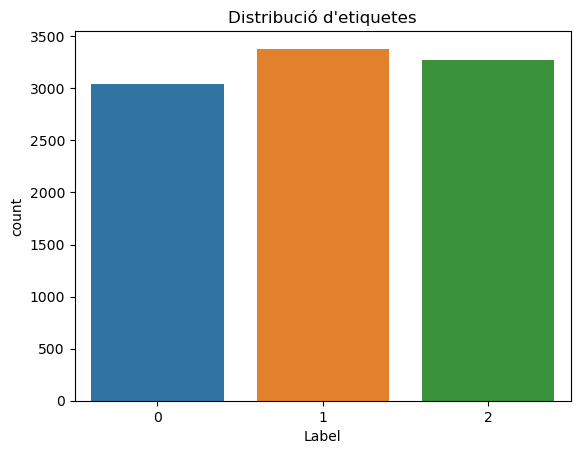

In [7]:
# Histograma de la variable objectiu (etiquetes)
sns.countplot(x='Label', data=dades)
plt.title('Distribució d\'etiquetes')
plt.show()


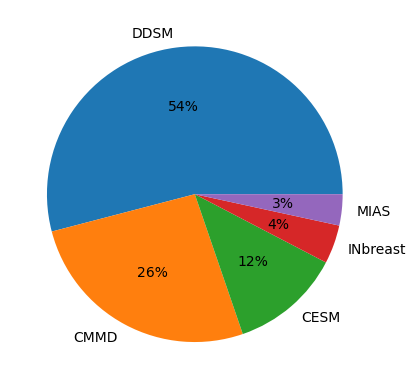

In [8]:

dades['Database'] = dades['Database'].astype('category')
  
plt.pie(dades['Database'].value_counts().values, labels=dades['Database'].value_counts().index, autopct='%.0f%%') 
  
plt.show() 

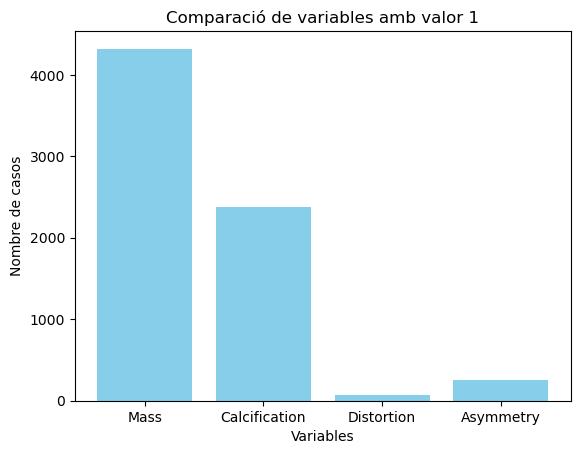

In [9]:
subset = dades[(dades['Mass'] == 1) | (dades['Calcification'] == 1) | (dades['Distortion'] == 1) | (dades['Asymmetry'] == 1)]
num_casos = len(subset)

etiquetes = ['Mass', 'Calcification', 'Distortion', 'Asymmetry']
valors = [subset['Mass'].sum(), subset['Calcification'].sum(), subset['Distortion'].sum(), subset['Asymmetry'].sum()]

plt.bar(etiquetes, valors, color='skyblue')
plt.title('Comparació de variables amb valor 1')
plt.xlabel('Variables')
plt.ylabel('Nombre de casos')
plt.show()


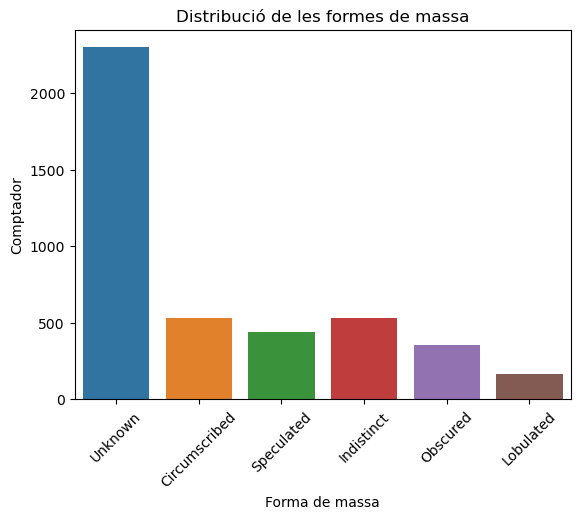

In [10]:
data_masses = dades[dades['Mass'] == 1 ]
sns.countplot(x='Mass_shape', data=data_masses)
plt.title('Distribució de les formes de massa')
plt.xlabel('Forma de massa')
plt.ylabel('Comptador')
plt.xticks(rotation=45)
plt.show()

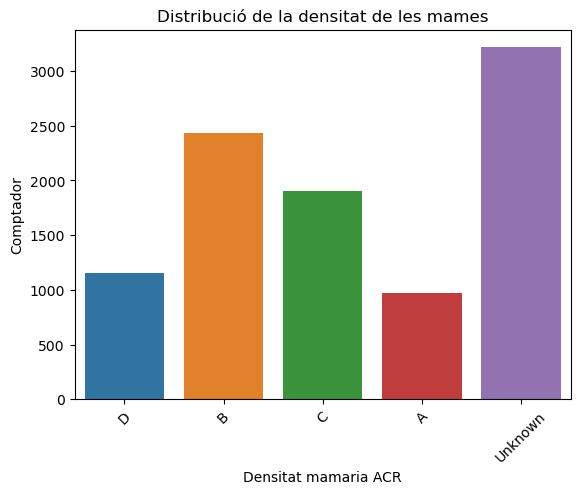

ACR
Unknown    3218
B          2438
C          1901
D          1156
A           975
Name: count, dtype: int64

In [11]:
sns.countplot(x='ACR', data=dades)
plt.title('Distribució de la densitat de les mames')
plt.xlabel('Densitat mamaria ACR')
plt.ylabel('Comptador')
plt.xticks(rotation=45)
plt.show()

dades['ACR'].value_counts()

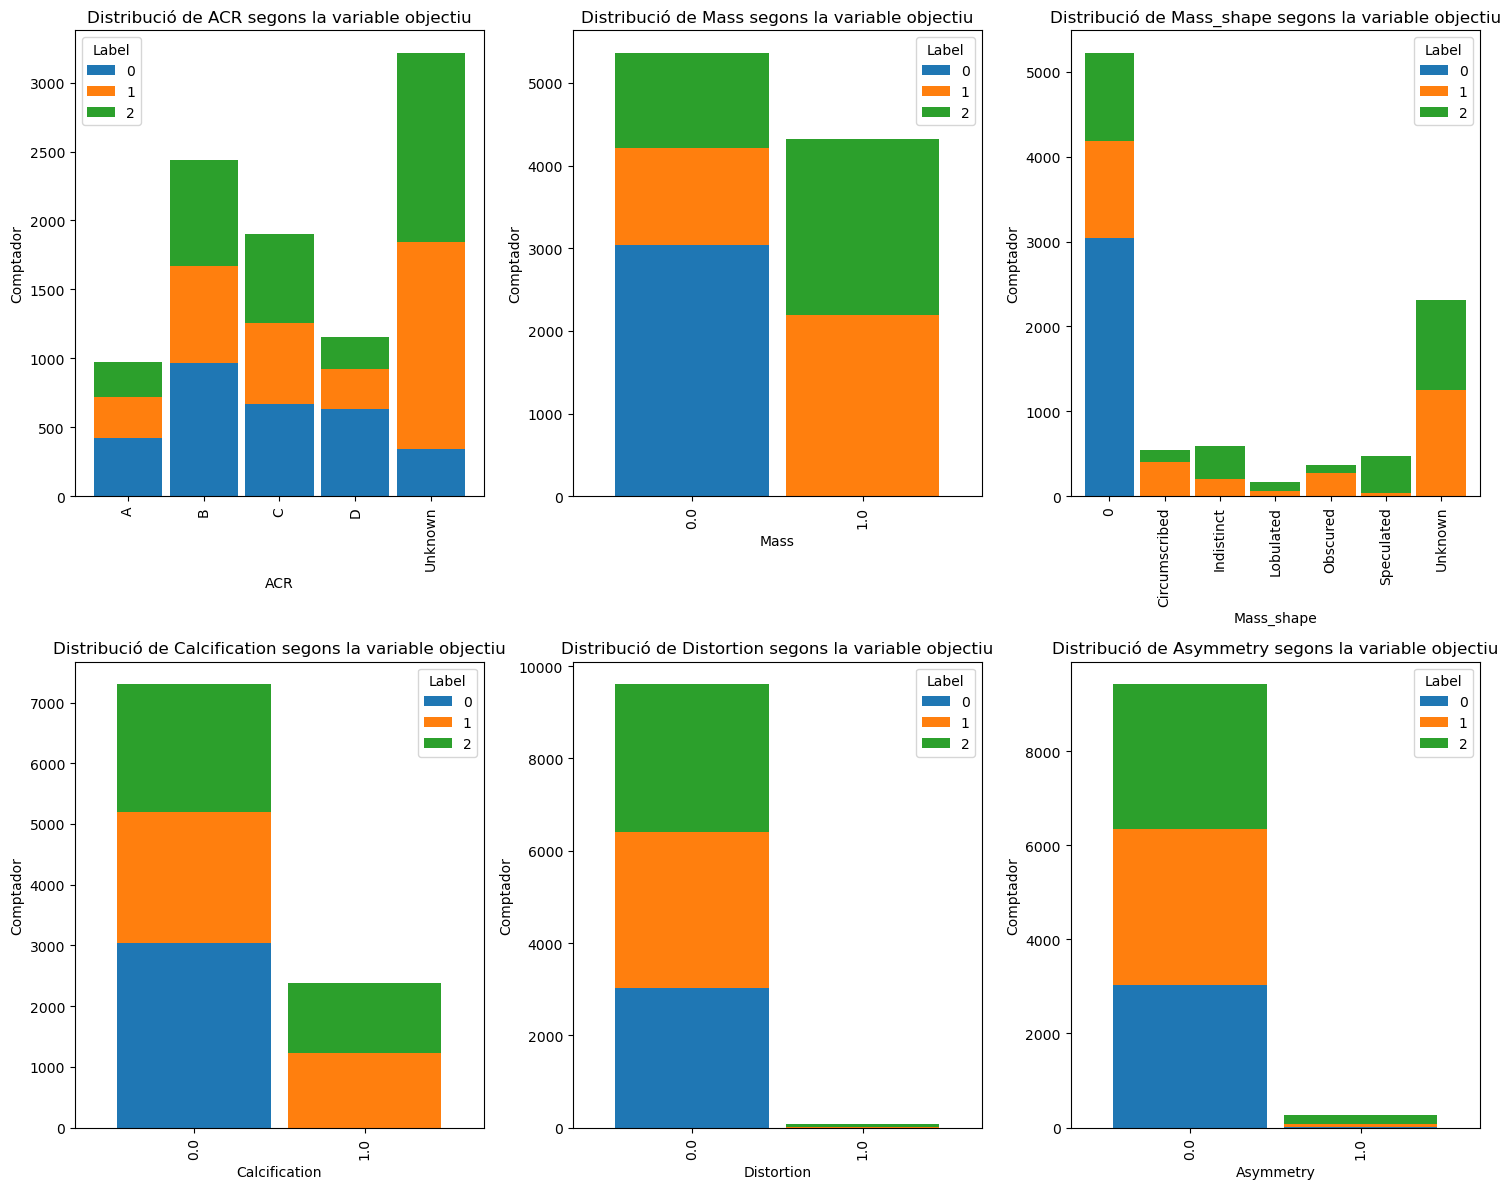

In [12]:
selected_columns = dades[['Label', 'ACR', 'Mass', 'Mass_shape', 'Calcification', 'Distortion', 'Asymmetry']]

import matplotlib.pyplot as plt

features = selected_columns.columns.drop('Label')

num_rows = len(features) // 3 + (len(features) % 3 > 0)  # Arrodonir cap amunt
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))

for i, feature in enumerate(features):
    contingency_table = pd.crosstab(selected_columns[feature], selected_columns['Label'])
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    contingency_table.plot(kind='bar', stacked=True, ax=ax, width=0.9)
    ax.set_title(f'Distribució de {feature} segons la variable objectiu')
    ax.set_xlabel(feature)
    ax.set_ylabel('Comptador')
    ax.legend(title='Label')

for i in range(len(features), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    if num_rows > 1:
        fig.delaxes(axes[row, col])
    else:
        fig.delaxes(axes[col])

plt.tight_layout()

plt.show()